In [1]:
# Imports
import os
import numpy as np
import random
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import cv2 as cv #You need to have OpenCV installed for this to work

In [2]:
# Set random seeds (for reproducibility requirement)
os.environ['PYTHONHASHSEED']=str(1)
np.random.seed(1)
random.seed(1)

In [3]:
# Load Train Data
trn_raw_df = pd.read_csv('train.csv')
trn_raw_df.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,...,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,...,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,...,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,...,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,...,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,...,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078


In [4]:
# Load Test Data
tst_raw_df = pd.read_csv('test.csv')
tst_raw_df.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,...,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image
0,49I3SOKLI2CMNGP4,_FwKTE4dm,NaN,Set,Not verified,fa0a86,fc37c4,0a0101,False,-18000.0,...,Mon Jul 20 21:05:24 +0000 2009,Quito,31528,2148,12926,469,business,13.827,3.4062,49I3SOKLI2CMNGP4.png
1,727IRIR59A3P88LK,tDMVTsvWbdpud,NaN,Not set,Not verified,ff0000,e6e6e6,001941,False,36000.0,...,Wed Aug 05 22:31:34 +0000 2009,Brisbane,42857,262,11678,1806,government,24.019,3.2656,727IRIR59A3P88LK.png
2,LN95SD15SRPCEE8F,k_TUXA297j,https://blob/5ljjaio2rp.com,Set,Verified,0d0101,000000,000000,False,-25200.0,...,Fri Mar 18 18:36:02 +0000 2011,Pacific Time (US & Canada),40237847,392,9395,59247,unknown,26.011,12.1619,LN95SD15SRPCEE8F.png
3,TB11I7F0PN033D4T,HRDr8yt4s7M,NaN,Set,Verified,0000ff,e0ff92,9ae4e8,False,-25200.0,...,Sun Apr 08 05:45:46 +0000 2007,Pacific Time (US & Canada),230166,702,10507,2695,celebrity,26.127,2.1131,TB11I7F0PN033D4T.png
4,32PSGCK5PATHMR07,PXOI0egSsDqrve,https://blob/t3hjJ0c/Mo.com,Set,Not verified,992f09,ddeef6,ffffff,False,NaN,...,Mon Jun 04 19:51:04 +0000 2012,NaN,1199,1701,1022,8,unknown,17.878,3.9660,32PSGCK5PATHMR07.png


## Data exploration

In [5]:
# Number of examples
print('Number of examples =',trn_raw_df.shape[0])

Number of examples = 7500


In [6]:
# Number of columns
print('Number of columns =',len(trn_raw_df.columns))

Number of columns = 24


In [7]:
# Information about columns
print('#\tType\t\tColumn name')
cter = 0
for col in trn_raw_df.columns:
    print(str(cter)+'.\t'+str(trn_raw_df[col].dtype)+':   \t'+col)
    cter += 1

#	Type		Column name
0.	object:   	Id
1.	object:   	User Name
2.	object:   	Personal URL
3.	object:   	Profile Cover Image Status
4.	object:   	Profile Verification Status
5.	object:   	Profile Text Color
6.	object:   	Profile Page Color
7.	object:   	Profile Theme Color
8.	bool:   	Is Profile View Size Customized?
9.	float64:   	UTC Offset
10.	object:   	Location
11.	object:   	Location Public Visibility
12.	object:   	User Language
13.	object:   	Profile Creation Timestamp
14.	object:   	User Time Zone
15.	int64:   	Num of Followers
16.	int64:   	Num of People Following
17.	int64:   	Num of Status Updates
18.	int64:   	Num of Direct Messages
19.	object:   	Profile Category
20.	float64:   	Avg Daily Profile Visit Duration in seconds
21.	float64:   	Avg Daily Profile Clicks
22.	object:   	Profile Image
23.	int64:   	Num of Profile Likes


### Column Features

In [8]:
# Preview columns
ixCol = 12
col = trn_raw_df.columns[ixCol]
print('Column:',col)
print()
print('Missing values: ',trn_raw_df[col].isna().sum())
print()
print('Mode: ',trn_raw_df[col].mode())
print()
print(trn_raw_df[col])
print()
print('Unique values:',trn_raw_df[col].unique())
print()
for lang in trn_raw_df[col].unique():
    print(lang,':',np.round(np.mean(trn_raw_df[col]==lang),2))

#plt.hist(trn_raw_df[col].fillna(trn_raw_df[col].median()),bins=100)

Column: User Language

Missing values:  0

Mode:  0    en
dtype: object

0       en
1       en
2       en
3       en
4       en
        ..
7495    en
7496    pt
7497    en
7498    pt
7499    ja
Name: User Language, Length: 7500, dtype: object

Unique values: ['en' 'pt' 'tr' 'it' 'es' 'ja' 'de' 'zh-cn' 'nl' 'ar' 'fr' 'ko' 'ru'
 'en-gb' 'hu' 'id' 'cs' 'pl' 'ca' 'sk' 'sv' 'el' 'th' 'zh-TW' 'fi' 'da'
 'sr' 'uk']

en : 0.71
pt : 0.03
tr : 0.02
it : 0.02
es : 0.12
ja : 0.02
de : 0.01
zh-cn : 0.0
nl : 0.01
ar : 0.01
fr : 0.03
ko : 0.01
ru : 0.01
en-gb : 0.01
hu : 0.0
id : 0.0
cs : 0.0
pl : 0.0
ca : 0.0
sk : 0.0
sv : 0.0
el : 0.0
th : 0.0
zh-TW : 0.0
fi : 0.0
da : 0.0
sr : 0.0
uk : 0.0


### Images

(32, 32, 3)
1
Proportion = 0.39029947916666663
Histogram (Component 1): [41 21 51 73 24 30 18 34 33 34 21 11  7  0]
1.0
Histogram (Component 2): [77 71 26 23  3  4 17 11 25 63 54 19  5  0]
1.0
Histogram (Component 3): [44 15 17 17 20 78 38 16 42 33 52 30  1  0]
1.0


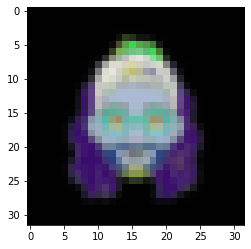

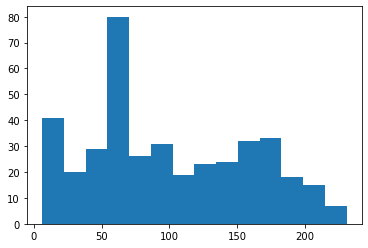

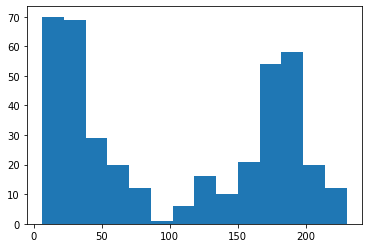

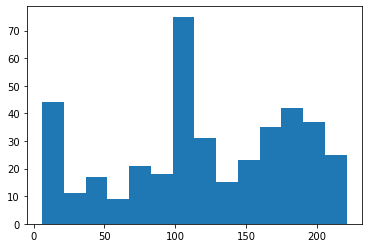

In [9]:
ixSample = 7000
img = cv.imread('train_profile_images/profile_images_train/'+trn_raw_df['Profile Image'][ixSample],cv.IMREAD_UNCHANGED)

# Basic characteristics
print(img.shape)
print(img.min())
#print(np.unique(img[:,:,1]))

# Find a black threshold
black_th = 5
#img[img<=black_th]=255
plt.imshow(img)

# Proportion: The proportion of pixels that are not black
prop = 1-np.mean(img<=black_th)
print('Proportion =',prop)

# PMFs: Bins from histograms from each component (a few bins only) (excluding black!)
# Comp1
aux = img[:,:,0].squeeze().reshape((32*32,1))
aux = aux[aux>black_th]
#print('aux:',aux)
plt.figure()
plt.hist(aux,bins=14)
cmp1Hist,_ = np.histogram(aux,bins=14,range=(black_th+1,255))
print('Histogram (Component 1):',cmp1Hist)
cmp1PMF = cmp1Hist/np.sum(cmp1Hist)
print(np.sum(cmp1PMF))

# Comp2
aux = img[:,:,1].squeeze().reshape((32*32,1))
aux = aux[aux>black_th]
#print('aux:',aux)
plt.figure()
plt.hist(aux,bins=14)
cmp2Hist,_ = np.histogram(aux,bins=14,range=(black_th+1,255))
print('Histogram (Component 2):',cmp2Hist)
cmp2PMF = cmp2Hist/np.sum(cmp2Hist)
print(np.sum(cmp2PMF))

# Comp3
aux = img[:,:,2].squeeze().reshape((32*32,1))
aux = aux[aux>black_th]
#print('aux:',aux)
plt.figure()
plt.hist(aux,bins=14)
cmp3Hist,_ = np.histogram(aux,bins=14,range=(black_th+1,255))
print('Histogram (Component 3):',cmp3Hist)
cmp3PMF = cmp3Hist/np.sum(cmp3Hist)
print(np.sum(cmp3PMF))

## Define transformation, encoding and imputation for all (non-image) features

In [10]:
# Auxiliary function to re-format (from string to timestamp in seconds)
def col13_to_timestamp(x,):
    y = int(x[-4:])
    m = x[4:7]
    if m=='Jan':
        m = 1
    elif m=='Feb':
        m = 2
    elif m=='Mar':
        m = 3
    elif m=='Apr':
        m = 4
    elif m=='May':
        m = 5
    elif m=='Jun':
        m = 6
    elif m=='Jul':
        m = 7
    elif m=='Aug':
        m = 8
    elif m=='Sep':
        m = 9
    elif m=='Oct':
        m = 10
    elif m=='Nov':
        m = 11
    elif m=='Dec':
        m = 12
    d = int(x[8:10])
    r = x[11:-11].split(':')
    hr = int(r[0])
    mn = int(r[1])
    sc = int(r[2])
    mydt = datetime(y, m, d, hour=hr, minute=mn, second=sc)
    
    return mydt.timestamp()

In [11]:
# Create new dataframe with encoded variables
trn_df_xplr = pd.DataFrame(trn_raw_df['Id']) #Keep the 'Id' variable as it is the identification for each example

# 1. 'User Name' is redundant given 'Id', so we can drop it

# 2. 'Personal URL' can be represented as if it exists or not
trn_df_xplr['HasPersonalURL'] = trn_raw_df['Personal URL'].notna()

# 3. 'Profile Cover Image Status' is a binary variable. The few missing values were set as 'Not set' (we assumed it to be the default)
#     'Set' = True, 
trn_df_xplr['IsCoverImageSet'] = (trn_raw_df['Profile Cover Image Status'].fillna('Not set') == 'Set')

# 4. 'Profile Verification Status' is categorical and can take 3 values. We can encode it as one-hot
trn_df_xplr['Verif_Not'] = trn_raw_df['Profile Verification Status'] == 'Not verified'
trn_df_xplr['Verif_Pen'] = trn_raw_df['Profile Verification Status'] == 'Pending'
trn_df_xplr['Verif_Yes'] = trn_raw_df['Profile Verification Status'] == 'Verified'

# 5. 'Profile Text Color' is RGB in hexadecimal. We encoded it as 3 separate features in decimal
#     *For the moment, the 66 missing values were imputed with the mode
trn_df_xplr['TextColor_R'] = trn_raw_df['Profile Text Color'].fillna(trn_raw_df['Profile Text Color'].mode().values[0]).astype('str').str[0:2].apply(lambda x: int(x,16))
trn_df_xplr['TextColor_G'] = trn_raw_df['Profile Text Color'].fillna(trn_raw_df['Profile Text Color'].mode().values[0]).astype('str').str[2:4].apply(lambda x: int(x,16))
trn_df_xplr['TextColor_B'] = trn_raw_df['Profile Text Color'].fillna(trn_raw_df['Profile Text Color'].mode().values[0]).astype('str').str[4:6].apply(lambda x: int(x,16))

# 6. 'Profile Page Color' is RGB in hexadecimal. We encoded it as 3 separate features in decimal
#     *For the moment, the 78 missing values were imputed with the mode
trn_df_xplr['PageColor_R'] = trn_raw_df['Profile Page Color'].fillna(trn_raw_df['Profile Page Color'].mode().values[0]).astype('str').str[0:2].apply(lambda x: int(x,16))
trn_df_xplr['PageColor_G'] = trn_raw_df['Profile Page Color'].fillna(trn_raw_df['Profile Page Color'].mode().values[0]).astype('str').str[2:4].apply(lambda x: int(x,16))
trn_df_xplr['PageColor_B'] = trn_raw_df['Profile Page Color'].fillna(trn_raw_df['Profile Page Color'].mode().values[0]).astype('str').str[4:6].apply(lambda x: int(x,16))

# 7. 'Profile Theme Color' is RGB in hexadecimal. We encoded it as 3 separate features in decimal
#     *For the moment, the 72 missing values were imputed with the mode
trn_df_xplr['ThemeColor_R'] = trn_raw_df['Profile Theme Color'].fillna(trn_raw_df['Profile Theme Color'].mode().values[0]).astype('str').str[0:2].apply(lambda x: int(x,16))
trn_df_xplr['ThemeColor_G'] = trn_raw_df['Profile Theme Color'].fillna(trn_raw_df['Profile Theme Color'].mode().values[0]).astype('str').str[2:4].apply(lambda x: int(x,16))
trn_df_xplr['ThemeColor_B'] = trn_raw_df['Profile Theme Color'].fillna(trn_raw_df['Profile Theme Color'].mode().values[0]).astype('str').str[4:6].apply(lambda x: int(x,16))

# 8. 'Is Profile View Size Customized?' is boolean
trn_df_xplr['IsViewSizeCustomized'] = trn_raw_df['Is Profile View Size Customized?']

# 9. 'UTC Offset'. Missing values were imputed with the median
trn_df_xplr['UTCOffset'] = trn_raw_df['UTC Offset'].fillna(trn_raw_df['UTC Offset'].median())

# 10. 'Location' is categorical and has too many possible values. Also seems noisy. Dropped

# 11. 'Location Public Visibility'. Boolean variable: Enabled=True, Disabled=False
trn_df_xplr['LocPubliclyVisible'] = trn_raw_df['Location Public Visibility'].replace(['Enabled','disabled','enabled','??','Disabled'],[True,False,True,False,False])

# 12. 'User Language' is categorical and has many possible values. However, only 2 categories
#     represent more than 10 % of the training population. Thus, we encoded them as one-hot
trn_df_xplr['Lang_EN'] = np.logical_or(trn_raw_df['User Language'] == 'en',trn_raw_df['User Language'] == 'en-gb')
trn_df_xplr['Lang_ES'] = trn_raw_df['User Language'] == 'es'

# 13. 'Profile Creation Timestamp' converted from string to a timestamp
trn_df_xplr['CreationTimestamp'] = trn_raw_df['Profile Creation Timestamp'].astype('string').apply(lambda x: col13_to_timestamp(x))

# 14. 'User Time Zone' was dropped because it is redundant with UTC offset.
#     Missing values occur in both features simultaneously

# 15. 'Num of Followers' is int64. Histogram is exponential, so applied log-transform for more even distribution.
trn_df_xplr['LogFollowers'] = np.log(trn_raw_df['Num of Followers']+1)

# 16. 'Num of People Following' is int64. Histogram is exponential, so log-transformed as well
trn_df_xplr['LogPeopleFollowing'] = np.log(trn_raw_df['Num of People Following']+1)

# 17. 'Num of Status Updates' is int64. Histogram is exponential, so log-transformed as well
trn_df_xplr['LogStatusUpdates'] = np.log(trn_raw_df['Num of Status Updates']+1)

# 18. 'Num of Direct Messages'
trn_df_xplr['LogDirectMessages'] = np.log(trn_raw_df['Num of Direct Messages']+1)

# 19. 'Profile Category' is categorical and has 4 possible values.
#     Encoded as one-hot variables because each category might have very different impact
#     and numerical algorithms can consider them similar if encoded as 4 integers.
#     Category ' ' was set to 'unknown' (240 rows)
trn_df_xplr['Cat_Business'] = trn_raw_df['Profile Category'].replace(' ','unknown') == 'business'
trn_df_xplr['Cat_Celebrity'] = trn_raw_df['Profile Category'].replace(' ','unknown') == 'celebrity'
trn_df_xplr['Cat_Government'] = trn_raw_df['Profile Category'].replace(' ','unknown') == 'government'
trn_df_xplr['Cat_Unknown'] = trn_raw_df['Profile Category'].replace(' ','unknown') == 'unknown'

# 20. 'Avg Daily Profile Visit Duration in seconds' is float64.
#     Missing values imputed as the median of the population. Median is more robust to outliers than the mean
trn_df_xplr['AvgDailyVisitDuration'] = trn_raw_df['Avg Daily Profile Visit Duration in seconds'].fillna(trn_raw_df['Avg Daily Profile Visit Duration in seconds'].median())

# 21. 'Avg Daily Profile Clicks' is float64. Histogram looks lognormal, so applied log-transformation as well
trn_df_xplr['LogClicks'] = np.log(trn_raw_df['Avg Daily Profile Clicks'].fillna(trn_raw_df['Avg Daily Profile Clicks'].median())+1)

# 22. 'Profile Image'
trn_df_xplr['Image'] = trn_raw_df['Profile Image']

# 23. 'Num of Profile Likes'. Histogram is exponential, so applied log-transformation
trn_df_xplr['LogLikes'] = np.log(trn_raw_df['Num of Profile Likes']+1)

trn_df_xplr

,Id,HasPersonalURL,IsCoverImageSet,Verif_Not,Verif_Pen,Verif_Yes,TextColor_R,TextColor_G,TextColor_B,PageColor_R,...,LogStatusUpdates,LogDirectMessages,Cat_Business,Cat_Celebrity,Cat_Government,Cat_Unknown,AvgDailyVisitDuration,LogClicks,Image,LogLikes
0,AL85S14OMDPF01I9,False,True,False,False,True,219,26,44,234,...,10.335595,6.773080,True,False,False,False,14.792,0.946277,AL85S14OMDPF01I9.png,7.943073
1,HI11QOPD7BLJTO7Q,False,True,False,False,True,0,153,204,246,...,9.005896,5.673323,False,False,False,True,8.183,2.507825,HI11QOPD7BLJTO7Q.png,7.125283
2,JS49LP5P72RI1OQB,False,True,True,False,False,31,194,222,239,...,8.455105,5.429346,False,False,False,True,31.823,0.452667,JS49LP5P72RI1OQB.png,7.352441
3,S0GDSC09MACCLBJP,True,False,False,False,True,5,0,0,97,...,10.882133,8.303009,True,False,False,False,23.052,1.614724,S0GDSC09MACCLBJP.png,8.755107
4,CRSEMK4QER6LDJSA,True,True,True,False,False,88,66,77,247,...,8.093157,4.875197,False,False,False,True,8.418,1.593898,CRSEMK4QER6LDJSA.png,6.983790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,KP5DR7CTN8CNLG8P,False,False,False,False,True,73,7,7,221,...,6.893656,4.043051,False,False,False,True,24.792,2.209439,KP5DR7CTN8CNLG8P.png,7.225481
7496,SGNF9P1P3922T34T,False,False,True,False,False,0,0,0,255,...,9.935616,5.153292,False,False,False,True,26.006,0.639535,SGNF9P1P3922T34T.png,7.249926
7497,O00FTLDT6O803LD0,False,True,False,False,True,0,132,180,221,...,7.761745,5.605802,False,False,False,True,15.030,1.357560,O00FTLDT6O803LD0.png,7.119636
7498,9F04JLR9JGT8R3EJ,False,True,True,False,False,145,210,250,221,...,11.209534,5.849325,True,False,False,False,11.948,1.020867,9F04JLR9JGT8R3EJ.png,7.008505


## Functions to perform data preprocessing based on definitions from above

In [12]:
# Imputes missing values from features.
#     For the training set, leave impute_stats as None. It will estimate the imputation values.
#     For the testing set, give the impute_stats obtained during training. It will impute missing values
#         based on the statistics of the training set.
def impute_feats(raw_df,impute_stats=None):
    if impute_stats is None:
        impute_stats = dict()
        # 'Profile Text Color' imputed with the mode
        impute_stats['Profile Text Color_Mode'] = raw_df['Profile Text Color'].mode().values[0]
        # 'Profile Page Color' imputed with the mode
        impute_stats['Profile Page Color_Mode'] = raw_df['Profile Page Color'].mode().values[0]
        # 'Profile Theme Color' imputed with the mode
        impute_stats['Profile Theme Color_Mode'] = raw_df['Profile Theme Color'].mode().values[0]
        # 'UTC Offset' imputed with the median
        impute_stats['UTC Offset_Median'] = raw_df['UTC Offset'].median()
        # 'Avg Daily Profile Visit Duration in seconds' imputed with the median
        impute_stats['Avg Daily Profile Visit Duration in seconds_Median'] = raw_df['Avg Daily Profile Visit Duration in seconds'].median()
        # 'Avg Daily Profile Clicks' imputed with the median
        impute_stats['Avg Daily Profile Clicks_Median'] = raw_df['Avg Daily Profile Clicks'].median()
    new_df = raw_df.copy()
    new_df['Profile Cover Image Status'].fillna('Not set',inplace=True)
    new_df['Profile Text Color'].fillna(impute_stats['Profile Text Color_Mode'],inplace=True)
    new_df['Profile Page Color'].fillna(impute_stats['Profile Page Color_Mode'],inplace=True)
    new_df['Profile Theme Color'].fillna(impute_stats['Profile Theme Color_Mode'],inplace=True)
    new_df['UTC Offset'].fillna(impute_stats['UTC Offset_Median'],inplace=True)
    new_df['Profile Category'].replace(' ','unknown',inplace=True)
    new_df['Avg Daily Profile Visit Duration in seconds'].fillna(impute_stats['Avg Daily Profile Visit Duration in seconds_Median'],inplace=True)
    new_df['Avg Daily Profile Clicks'].fillna(impute_stats['Avg Daily Profile Clicks_Median'],inplace=True)
    return new_df, impute_stats

In [13]:
# Cleans up the raw data based on the definitions from exploratory analysis (see above)
def clean_data(input_df):
    # Create output dataframe
    clean_df = pd.DataFrame(input_df['Id'],copy=True) #Keep the 'Id' variable as it is the identification for each example
    
    # 2. 'Personal URL' can be represented as if it exists or not
    clean_df['HasPersonalURL'] = input_df['Personal URL'].notna()

    # 3. 'Profile Cover Image Status' is a binary variable. The few missing values were set as 'Not set' (assumed it to be the default)
    #     'Set' = True, 
    clean_df['IsCoverImageSet'] = input_df['Profile Cover Image Status'] == 'Set'

    # 4. 'Profile Verification Status' is categorical and can take 3 values. We can encode it as one-hot
    clean_df['Verif_Not'] = input_df['Profile Verification Status'] == 'Not verified'
    clean_df['Verif_Pen'] = input_df['Profile Verification Status'] == 'Pending'
    clean_df['Verif_Yes'] = input_df['Profile Verification Status'] == 'Verified'

    # 5. 'Profile Text Color' is RGB in hexadecimal. We encoded it as 3 separate features in decimal
    clean_df['TextColor_R'] = input_df['Profile Text Color'].astype('str').str[0:2].apply(lambda x: int(x,16))
    clean_df['TextColor_G'] = input_df['Profile Text Color'].astype('str').str[2:4].apply(lambda x: int(x,16))
    clean_df['TextColor_B'] = input_df['Profile Text Color'].astype('str').str[4:6].apply(lambda x: int(x,16))

    # 6. 'Profile Page Color' is RGB in hexadecimal. We encoded it as 3 separate features in decimal
    clean_df['PageColor_R'] = input_df['Profile Page Color'].astype('str').str[0:2].apply(lambda x: int(x,16))
    clean_df['PageColor_G'] = input_df['Profile Page Color'].astype('str').str[2:4].apply(lambda x: int(x,16))
    clean_df['PageColor_B'] = input_df['Profile Page Color'].astype('str').str[4:6].apply(lambda x: int(x,16))

    # 7. 'Profile Theme Color' is RGB in hexadecimal. We encoded it as 3 separate features in decimal
    clean_df['ThemeColor_R'] = input_df['Profile Theme Color'].astype('str').str[0:2].apply(lambda x: int(x,16))
    clean_df['ThemeColor_G'] = input_df['Profile Theme Color'].astype('str').str[2:4].apply(lambda x: int(x,16))
    clean_df['ThemeColor_B'] = input_df['Profile Theme Color'].astype('str').str[4:6].apply(lambda x: int(x,16))

    # 8. 'Is Profile View Size Customized?' is boolean
    clean_df['IsViewSizeCustomized'] = input_df['Is Profile View Size Customized?']

    # 9. 'UTC Offset'.
    clean_df['UTCOffset'] = input_df['UTC Offset']

    # 11. 'Location Public Visibility'. Boolean variable: Enabled=True, Disabled=False
    clean_df['LocPubliclyVisible'] = input_df['Location Public Visibility'].replace(['Enabled','disabled','enabled','??','Disabled'],[True,False,True,False,False])

    # 12. 'User Language' is categorical and has many possible values. However, only 2 categories
    #     represent more than 10 % of the training population. Thus, we encoded them as one-hot
    clean_df['Lang_EN'] = np.logical_or(input_df['User Language'] == 'en',input_df['User Language'] == 'en-gb')
    clean_df['Lang_ES'] = input_df['User Language'] == 'es'

    # 13. 'Profile Creation Timestamp' converted from string to a timestamp
    clean_df['CreationTimestamp'] = input_df['Profile Creation Timestamp'].astype('string').apply(lambda x: col13_to_timestamp(x))

    # 15. 'Num of Followers' is int64. Histogram is exponential, so applied log-transform for more even distribution.
    clean_df['LogFollowers'] = np.log(input_df['Num of Followers']+1)

    # 16. 'Num of People Following' is int64. Histogram is exponential, so log-transformed as well
    clean_df['LogPeopleFollowing'] = np.log(input_df['Num of People Following']+1)

    # 17. 'Num of Status Updates' is int64. Histogram is exponential, so log-transformed as well
    clean_df['LogStatusUpdates'] = np.log(input_df['Num of Status Updates']+1)

    # 18. 'Num of Direct Messages'
    clean_df['LogDirectMessages'] = np.log(input_df['Num of Direct Messages']+1)

    # 19. 'Profile Category' is categorical and has 4 possible values.
    #     Encoded as one-hot variables because each category might have very different impact
    #     and numerical algorithms can consider them similar if encoded as 4 integers.
    clean_df['Cat_Business'] = input_df['Profile Category'] == 'business'
    clean_df['Cat_Celebrity'] = input_df['Profile Category'] == 'celebrity'
    clean_df['Cat_Government'] = input_df['Profile Category'] == 'government'
    clean_df['Cat_Unknown'] = input_df['Profile Category'] == 'unknown'

    # 20. 'Avg Daily Profile Visit Duration in seconds' is float64.
    clean_df['AvgDailyVisitDuration'] = input_df['Avg Daily Profile Visit Duration in seconds']

    # 21. 'Avg Daily Profile Clicks' is float64. Histogram looks lognormal, so applied log-transformation as well
    clean_df['LogClicks'] = np.log(input_df['Avg Daily Profile Clicks']+1)

    # 22. 'Profile Image'
    clean_df['Image'] = input_df['Profile Image']
    
    return clean_df

In [14]:
# Preprocesses the raw data using the auxiliary functions above.
def preprocess(raw_train_df, raw_test_df):
    # Impute missing values
    train_df_imp, impute_stats = impute_feats(raw_train_df)
    test_df_imp,_ = impute_feats(raw_test_df,impute_stats)
        
    # Clean-up data
    clean_train_df = clean_data(train_df_imp)
    clean_train_df['LogLikes'] = np.log(train_df_imp['Num of Profile Likes']+1)
    clean_test_df = clean_data(test_df_imp)
    
    return clean_train_df,clean_test_df

## Preprocess Data

In [15]:
trn_df,tst_df = preprocess(trn_raw_df,tst_raw_df)

# Check preprocess function
if trn_df.equals(trn_df_xplr):
    print('The preprocess function worked properly on the training data')
else:
    print('The preprocess function did not work with the training data')

The preprocess function worked properly on the training data


In [16]:
tst_df.head()

,Id,HasPersonalURL,IsCoverImageSet,Verif_Not,Verif_Pen,Verif_Yes,TextColor_R,TextColor_G,TextColor_B,PageColor_R,...,LogPeopleFollowing,LogStatusUpdates,LogDirectMessages,Cat_Business,Cat_Celebrity,Cat_Government,Cat_Unknown,AvgDailyVisitDuration,LogClicks,Image
0,49I3SOKLI2CMNGP4,False,True,True,False,False,250,10,134,252,...,7.672758,9.467073,6.152733,True,False,False,False,13.827,1.483013,49I3SOKLI2CMNGP4.png
1,727IRIR59A3P88LK,False,False,True,False,False,255,0,0,230,...,5.572154,9.365548,7.499423,False,False,True,False,24.019,1.450583,727IRIR59A3P88LK.png
2,LN95SD15SRPCEE8F,True,True,False,False,True,13,1,1,0,...,5.973810,9.148039,10.989487,False,False,False,True,26.011,2.577326,LN95SD15SRPCEE8F.png
3,TB11I7F0PN033D4T,False,True,False,False,True,0,0,255,224,...,6.555357,9.259892,7.899524,False,True,False,False,26.127,1.135619,TB11I7F0PN033D4T.png
4,32PSGCK5PATHMR07,True,True,True,False,False,153,47,9,221,...,7.439559,6.930495,2.197225,False,False,False,True,17.878,1.602615,32PSGCK5PATHMR07.png


## (Some) Image Features (not used for final predictions)

### Compute Features

In [17]:
# Returns the proportion of pixels that are not black
def img_proportion(img,black_th=5):
    prop = 1-np.mean(img<=black_th)
    return prop

In [18]:
# Test img_proportion
print(img_proportion(img,5))

0.39029947916666663


In [19]:
# Returns the PMF from each component (a few bins only) (excluding black!)
def channel_pmfs(img,black_th=5,bins=14):
    numChan = img.shape[2]
    pmfs = list()
    for chan in range(numChan):
        aux = img[:,:,chan].squeeze().reshape((32*32,1))
        aux = aux[aux>black_th]
        cmpHist,_ = np.histogram(aux,bins=bins,range=(black_th+1,255))
        pmfs.append(cmpHist/np.sum(cmpHist))
    pmfs = np.array(pmfs)
    return pmfs

In [20]:
# Test channel_pmfs
print(channel_pmfs(img,5,14))

[[0.10301508 0.05276382 0.1281407  0.18341709 0.06030151 0.07537688
  0.04522613 0.08542714 0.08291457 0.08542714 0.05276382 0.02763819
  0.01758794 0.        ]
 [0.19346734 0.17839196 0.06532663 0.05778894 0.00753769 0.01005025
  0.04271357 0.02763819 0.06281407 0.15829146 0.13567839 0.04773869
  0.01256281 0.        ]
 [0.10918114 0.03722084 0.04218362 0.04218362 0.04962779 0.19354839
  0.0942928  0.03970223 0.10421836 0.08188586 0.12903226 0.07444169
  0.00248139 0.        ]]


### (Do not) Add Image Features to DataFrame

In [21]:
# Function to estimate all image features from all samples in a Series
def get_img_feats(imgs_series,path,black_th=5,bins=14):
    Feats = np.zeros((1,1+bins*3))
    for ixSample in range(imgs_series.shape[0]):
        img = cv.imread(path+imgs_series[ixSample],cv.IMREAD_UNCHANGED)

        prop = img_proportion(img,black_th)
        pmfs = channel_pmfs(img,black_th,bins).reshape((1,3*bins))
        Feats = np.append(Feats,np.expand_dims(np.append(prop,pmfs),0),axis=0)

    Feats = np.delete(Feats,0,axis=0)

    return Feats

In [22]:
# Get the features for both Train and Test data
black_th = 5
bins = 14
trn_Feats = get_img_feats(trn_df.Image,path='train_profile_images/profile_images_train/',black_th=black_th,bins=bins)
tst_Feats = get_img_feats(tst_df.Image,path='test_profile_images/profile_images_test/',black_th=black_th,bins=bins)

In [23]:
# (Do not) Concatenate the new features to the DataFrames (i.e., use only features from the CSV files)
#trn_df = pd.concat([trn_df.iloc[:,:-2],pd.DataFrame(trn_Feats),trn_df.iloc[:,-2:]],axis=1)
#tst_df = pd.concat([tst_df.iloc[:,:-1],pd.DataFrame(tst_Feats),tst_df.iloc[:,-1]],axis=1)

## Training and Model selection

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Split data
numFolds = 5
numSampl = trn_df.shape[0]
sampPerFold = int(numSampl/numFolds)

### Lasso

In [25]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
from sklearn.linear_model import LassoCV

lassoReg = LassoCV(cv=5, eps=1e-4, n_alphas=1000, normalize=True, random_state=1, verbose=False).fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

ypred = lassoReg.predict(trn_df.iloc[:,1:-2])
print('Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Training
    RMSLE: 1.832583556316522


### AdaBoost

In [26]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
from sklearn.ensemble import AdaBoostRegressor

steps = [('scaler', StandardScaler()), ('Adaboost', AdaBoostRegressor(random_state=1))]
pipeline = Pipeline(steps)

parameters = {'Adaboost__n_estimators':[1,6,10,50,100]}

# with 5 fold cross-validation
adaReg = GridSearchCV(pipeline, param_grid=parameters, cv=numFolds, n_jobs=4, refit=True, scoring='neg_root_mean_squared_error')
adaReg.fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

print('Cross-Validation')
print('    Best Parameter:', adaReg.best_params_)
print('    Best RMSLE:', adaReg.best_score_)
print()
ypred = adaReg.predict(trn_df.iloc[:,1:-2])
print('Re-Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Cross-Validation
    Best Parameter: {'Adaboost__n_estimators': 6}
    Best RMSLE: -1.9224804964661248

Re-Training
    RMSLE: 1.9091683075987658


### AdaBoost with Feature Selection by Lasso

In [27]:
# Reference: https://scikit-learn.org/stable/modules/feature_selection.html
from sklearn.feature_selection import SelectFromModel

steps = [('scaler', StandardScaler()), ('FeatSel', SelectFromModel(LassoCV(cv=5, eps=1e-4, n_alphas=1000, random_state=1))), ('Adaboost', AdaBoostRegressor(random_state=1))]
pipeline = Pipeline(steps)

parameters = {'Adaboost__n_estimators':np.arange(10)+1}

# with 5 fold cross-validation
adaLasso = GridSearchCV(pipeline, param_grid=parameters, cv=numFolds, n_jobs=4, refit=True, scoring='neg_root_mean_squared_error')
adaLasso.fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

print('Cross-Validation')
print('    Best Parameter:', adaLasso.best_params_)
print('    Best RMSLE:', adaLasso.best_score_)
print()
ypred = adaLasso.predict(trn_df.iloc[:,1:-2])
print('Re-Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Cross-Validation
    Best Parameter: {'Adaboost__n_estimators': 8}
    Best RMSLE: -1.9183732121561643

Re-Training
    RMSLE: 1.9136189407265927


### Kernel Ridge (RBF)

In [28]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html
from sklearn.kernel_ridge import KernelRidge

steps = [('scaler', StandardScaler()), ('KRidge', KernelRidge(kernel='rbf'))]

pipeline = Pipeline(steps)

parameters = {'KRidge__alpha':[0.4,0.45,0.5,0.55,0.6], 'KRidge__gamma':[0.008,0.01,0.012,0.015,0.02]}

# with 5 fold cross-validation
kridgeReg = GridSearchCV(pipeline, param_grid=parameters, cv=numFolds, n_jobs=4, refit=True, scoring='neg_root_mean_squared_error')
kridgeReg.fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

print('Cross-Validation')
print('    Best Parameter:', kridgeReg.best_params_)
print('    Best RMSLE:', kridgeReg.best_score_)
print()
ypred = kridgeReg.predict(trn_df.iloc[:,1:-2])
print('Re-Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Cross-Validation
    Best Parameter: {'KRidge__alpha': 0.5, 'KRidge__gamma': 0.01}
    Best RMSLE: -1.7568958950391185

Re-Training
    RMSLE: 1.6431575141169001


### Kernel Ridge (Poly)

In [29]:
steps = [('scaler', StandardScaler()), ('KRidge', KernelRidge(kernel='poly', gamma=1, coef0=1))]

pipeline = Pipeline(steps)

parameters = {'KRidge__alpha':np.linspace(0,2,5), 'KRidge__degree':[1,2,3]}

# with 5 fold cross-validation
kridgePoly = GridSearchCV(pipeline, param_grid=parameters, cv=numFolds, n_jobs=4, refit=True, scoring='neg_root_mean_squared_error')
kridgePoly.fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

print('Cross-Validation')
print('    Best Parameter:', kridgePoly.best_params_)
print('    Best RMSLE:', kridgePoly.best_score_)
print()
ypred = kridgePoly.predict(trn_df.iloc[:,1:-2])
print('Re-Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Cross-Validation
    Best Parameter: {'KRidge__alpha': 2.0, 'KRidge__degree': 2}
    Best RMSLE: -1.8003933948685493

Re-Training
    RMSLE: 1.6721466662595046


### Kernel Ridge (RBF) with Feature Selection by Lasso

In [30]:
steps = [('scaler', StandardScaler()), ('FeatSel',SelectFromModel(LassoCV(cv=5, eps=1e-4, n_alphas=1000, random_state=1))),('KRidge', KernelRidge(kernel='rbf'))]

pipeline = Pipeline(steps)

parameters = {'KRidge__alpha':[0.5,0.55,0.6,0.65,0.7], 'KRidge__gamma':[0.01,0.012,0.015,0.02,0.05]}

# with 5 fold cross-validation
kridgeWLasso = GridSearchCV(pipeline, param_grid=parameters, cv=numFolds, n_jobs=4, refit=True, scoring='neg_root_mean_squared_error')
kridgeWLasso.fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

print('Cross-Validation')
print('    Best Parameter:', kridgeWLasso.best_params_)
print('    Best RMSLE:', kridgeWLasso.best_score_)
print()
ypred = kridgeWLasso.predict(trn_df.iloc[:,1:-2])
print('Re-Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Cross-Validation
    Best Parameter: {'KRidge__alpha': 0.5, 'KRidge__gamma': 0.012}
    Best RMSLE: -1.7510650991153593

Re-Training
    RMSLE: 1.6535377599951204


### MLP Regressor

In [31]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
from sklearn.neural_network import MLPRegressor 

myMLPReg = MLPRegressor(hidden_layer_sizes=(50, 50), solver='adam', 
                        alpha=0.00001, batch_size=500, 
                        learning_rate='adaptive', 
                        learning_rate_init=0.001, power_t=0.5, 
                        max_iter=1500, shuffle=True, random_state=1, 
                        tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, 
                        early_stopping=False, validation_fraction=0.1, 
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                        n_iter_no_change=10, 
                        max_fun=15000)

steps = [('scaler', StandardScaler()), ('MLP', myMLPReg)]

pipeline = Pipeline(steps)

parameters = {'MLP__activation': ['tanh','relu']}

# with 5 fold cross-validation
mlpReg = GridSearchCV(pipeline, param_grid=parameters, cv=numFolds, n_jobs=4, refit=True, scoring='neg_root_mean_squared_error')
mlpReg.fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

print('Cross-Validation')
print('    Best Parameter:', mlpReg.best_params_)
print('    Best RMSLE:', mlpReg.best_score_)
print()
ypred = mlpReg.predict(trn_df.iloc[:,1:-2])
print('Re-Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Cross-Validation
    Best Parameter: {'MLP__activation': 'relu'}
    Best RMSLE: -2.3016093673133957

Re-Training
    RMSLE: 1.083743006354041


### MLP Regressor with Feature Selection by Lasso

In [32]:
myMLPReg = MLPRegressor(hidden_layer_sizes=(50, 50), solver='adam', 
                        alpha=0.00001, batch_size=500, 
                        learning_rate='adaptive', 
                        learning_rate_init=0.001, power_t=0.5, 
                        max_iter=1500, shuffle=True, random_state=1, 
                        tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, 
                        early_stopping=False, validation_fraction=0.1, 
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                        n_iter_no_change=10, 
                        max_fun=15000)

steps = [('scaler', StandardScaler()), ('FeatSel',SelectFromModel(LassoCV(cv=5, eps=1e-4, n_alphas=1000, random_state=1))), ('MLP', myMLPReg)]

pipeline = Pipeline(steps)

parameters = {'MLP__activation': ['tanh','relu']}

# with 5 fold cross-validation
mlpWLasso = GridSearchCV(pipeline, param_grid=parameters, cv=numFolds, n_jobs=4, refit=True, scoring='neg_root_mean_squared_error')
mlpWLasso.fit(trn_df.iloc[:,1:-2],trn_df.iloc[:,-1])

print('Cross-Validation')
print('    Best Parameter:', mlpWLasso.best_params_)
print('    Best RMSLE:', mlpWLasso.best_score_)
print()
ypred = mlpWLasso.predict(trn_df.iloc[:,1:-2])
print('Re-Training')
print('    RMSLE:',np.sqrt(np.mean((ypred-trn_df.iloc[:,-1])**2)))

Cross-Validation
    Best Parameter: {'MLP__activation': 'relu'}
    Best RMSLE: -2.2225719707335214

Re-Training
    RMSLE: 1.1050961373107224


## Testing

In [33]:
# Prepare output

# Get indices
out = pd.DataFrame(tst_df['Id'])

# Assign predictions
out['Predicted'] = (np.exp(kridgeReg.predict(tst_df.iloc[:,1:-1]))-1).astype('int32') # TODO: real predictions

In [34]:
# Check output
out.head()

,Id,Predicted
0,49I3SOKLI2CMNGP4,4121
1,727IRIR59A3P88LK,2060
2,LN95SD15SRPCEE8F,193
3,TB11I7F0PN033D4T,3069
4,32PSGCK5PATHMR07,172


In [35]:
# Export output
out.to_csv('predictions.csv', index=False)